In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

from eda import *

In [17]:
df = pd.read_csv('data/news_cleaned.csv')
df.columns = df.columns.str.lower()
df.head()

,matchdatetime,station,snippet,tokens
0,2017-01-31 05:53:28,BBCNEWS,beena part to do. the airline industry has not...,"['beena', 'part', 'airline', 'industry', 'part..."
1,2017-01-18 19:21:01,BBCNEWS,"it's beaten it by about 0.1, 0.12 degrees cels...","['beaten', '01', '012', 'degrees', 'celsius', ..."
2,2017-01-05 21:48:46,BBCNEWS,"contact more than expected, how. your co nta c...","['contact', 'expected', 'co', 'nta', 'ct', 'le..."
3,2017-01-05 21:13:33,BBCNEWS,"where every time a marketplace is closed down,...","['every', 'time', 'marketplace', 'closed', 'an..."
4,2017-01-11 03:11:51,BBCNEWS,"applause climate change, a controversial issue...","['applause', 'climate', 'change', 'controversi..."


In [25]:
# def remove_bigram_phrases(text, phrases_to_remove):
#     for phrase in phrases_to_remove:
#         text = text.replace(phrase, '')
#     return text

# # Climate bi-gram phrases
# climate_grams = ["climate change", "global warming", "climate crisis", "greenhouse gas", "greenhouse gases", "carbon tax"]

# # Apply the custom function to each row
# df['snippet_no_climate'] = df['snippet'].map(lambda x: remove_bigram_phrases(x, climate_grams))

# df.head(10)

,matchdatetime,station,snippet,tokens,snippet_no_climate
0,2017-01-31 05:53:28,BBCNEWS,beena part to do. the airline industry has not...,"['beena', 'part', 'airline', 'industry', 'part...",beena part to do. the airline industry has not...
1,2017-01-18 19:21:01,BBCNEWS,"it's beaten it by about 0.1, 0.12 degrees cels...","['beaten', '01', '012', 'degrees', 'celsius', ...","it's beaten it by about 0.1, 0.12 degrees cels..."
2,2017-01-05 21:48:46,BBCNEWS,"contact more than expected, how. your co nta c...","['contact', 'expected', 'co', 'nta', 'ct', 'le...","contact more than expected, how. your co nta c..."
3,2017-01-05 21:13:33,BBCNEWS,"where every time a marketplace is closed down,...","['every', 'time', 'marketplace', 'closed', 'an...","where every time a marketplace is closed down,..."
4,2017-01-11 03:11:51,BBCNEWS,"applause climate change, a controversial issue...","['applause', 'climate', 'change', 'controversi...","applause , a controversial issue which has see..."
5,2017-01-18 13:51:21,BBCNEWS,with mr trump's thinking. he's a former attorn...,"['mr', 'trumps', 'thinking', 'hes', 'former', ...",with mr trump's thinking. he's a former attorn...
6,2017-01-30 23:38:49,BBCNEWS,the problems we are facing today in europe? cl...,"['problems', 'facing', 'today', 'europe', 'cli...",the problems we are facing today in europe? ?
7,2017-01-18 21:43:18,BBCNEWS,"agreement, a global deal that came into force ...","['agreement', 'global', 'deal', 'came', 'force...","agreement, a global deal that came into force ..."
8,2017-01-10 02:10:55,BBCNEWS,"patrol on the far side. meanwhile, in italy, t...","['patrol', 'far', 'side', 'meanwhile', 'italy'...","patrol on the far side. meanwhile, in italy, t..."
9,2017-01-18 23:09:59,BBCNEWS,"set by the paris climate agreement, a global d...","['set', 'paris', 'climate', 'agreement', 'glob...","set by the paris climate agreement, a global d..."


In [60]:
def get_top_n_ngram(corpus: pd.Series, n_phrases: int=20, ngram_min: int=2, ngram_max: int=2, 
                    remove_stopwords: bool=True, remove_climate_phrases: bool=True) -> sns.barplot:
    """
    Finds most common n-gram phrases in a given corpus and plot its distribution.
    :param corpus: pd.Series, text column
    :param n_phrases: int, number of n-gram phrases to return
    :param ngram_min: int, lower n-gram range boundary
    :param ngram_max: int, upper n-gram range boundary
    :param stopwords: bool, toggle stop word removal
    :return: pd.DataFrame of n-grams and their respective counts
    """
    # Check if n-grams should include stop words
    if remove_stopwords:
        stopwords = 'english'
    else:
        stopwords = None

    try: 
        vec = CountVectorizer(ngram_range=(ngram_min, ngram_max), stop_words=stopwords).fit(corpus)

        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

        # Store word frequencies as pd.DataFrame for plotting
        df = pd.DataFrame(words_freq[:n_phrases], columns=['snippets', 'count'])

    except ValueError:
        print("Invalid input")
    
    return plot_ngram_dist(df, ngram_max, remove_stopwords, remove_climate_phrases)


def plot_ngram_dist(df: pd.DataFrame, ngram_max: int, remove_stopwords: bool, remove_climate_phrases: bool) -> None:
    """ 
    Plot the n-gram distribution.
    :param df: pd.DataFrame, dataframe of climate news snippets.
    :return: sns.histplot
    """
    sns.set_style('darkgrid')
    sns.set_theme(rc={'figure.figsize':(10,4)})

    # Plot bar chart of n-gram frequencies
    sns.barplot(df, x='snippets', y='count', legend=False)
    
    # Title conditions
    if ngram_max == 2:
        ngram = 'Bi'
    elif ngram_max == 3:
        ngram = 'Tri'
    elif ngram_max == 4:
        ngram = 'Four'
    else:
        ngram = 'N'

    if remove_stopwords:
        sw_condition = 'After'  
    else:  
        sw_condition = 'Before'

    if remove_climate_phrases:
        cp_condition = 'And Climate Phrases' 
    else: 
        cp_condition = ''
    
    plt.title(f"{ngram}-Gram Distribution {sw_condition} Removing Stop Words {cp_condition}", fontweight='bold')
    plt.xticks(rotation=60, fontsize=8)
    plt.xlabel("N-Grams")
    plt.ylabel("Count")

    # Save and show plot
    plt.savefig(f'figures/{ngram_max}_gram_dist_{sw_condition}_sw_{cp_condition}_removal.png')
    plt.show()

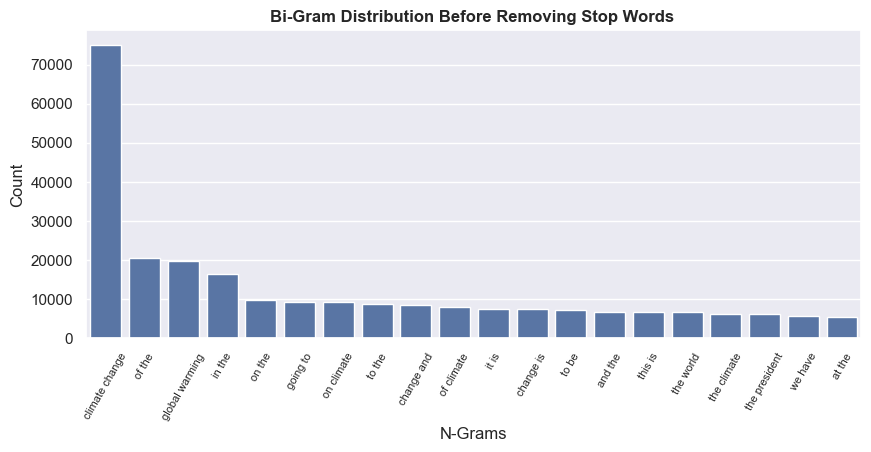

In [53]:
# Bi-gram distribution Before Removing Stopwords (Keep CLimate Phrases)
get_top_n_ngram(corpus=df['snippet'], remove_stopwords=False, remove_climate_phrases=False)

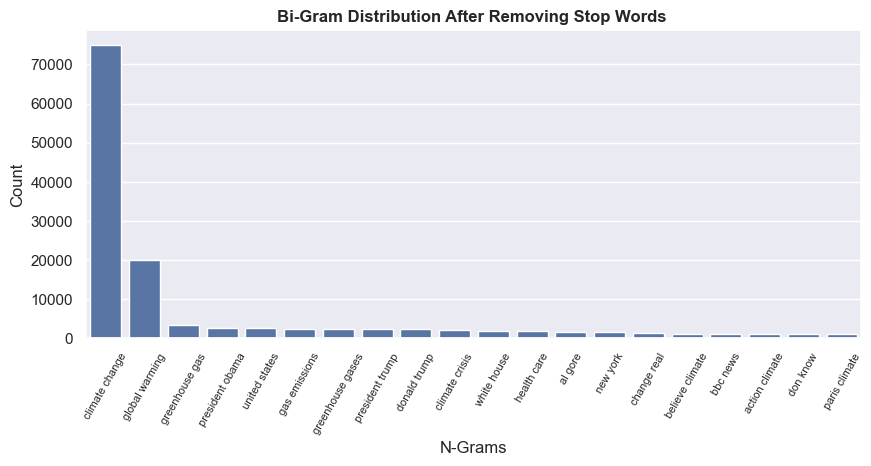

In [54]:
# Bi-gram distribution After Removing Stopwords (Keep CLimate Phrases)
get_top_n_ngram(corpus=df['snippet'], remove_climate_phrases=False)

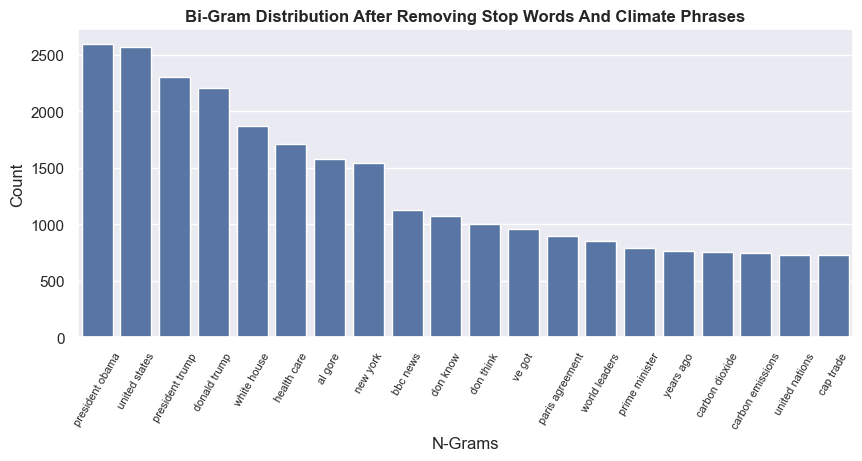

In [57]:
# Bi-gram distribution After Removing CLimate Phrases (Stop Words Removed)
get_top_n_ngram(corpus=df['snippet_no_climate'])

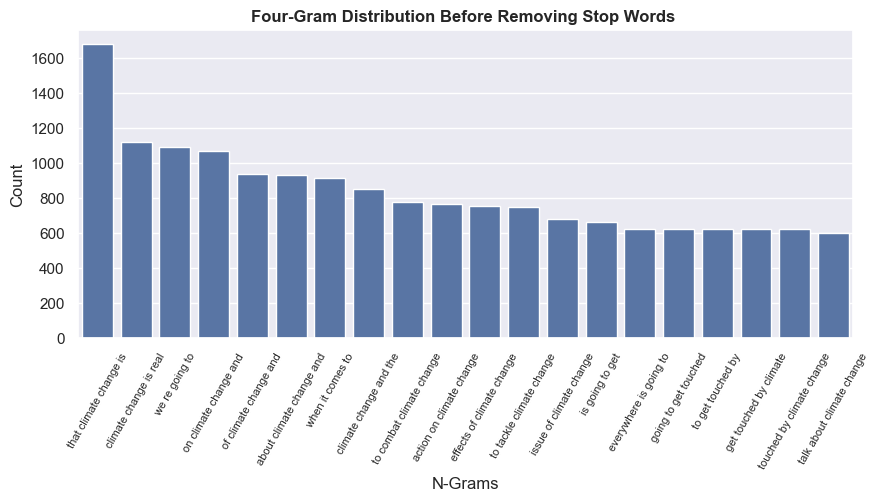

In [62]:
# Four-gram distribution Before Removing CLimate Phrases (Stop Words Removed)
get_top_n_ngram(corpus=df['snippet'], ngram_min=4, ngram_max=4, 
                remove_stopwords=False, remove_climate_phrases=False)

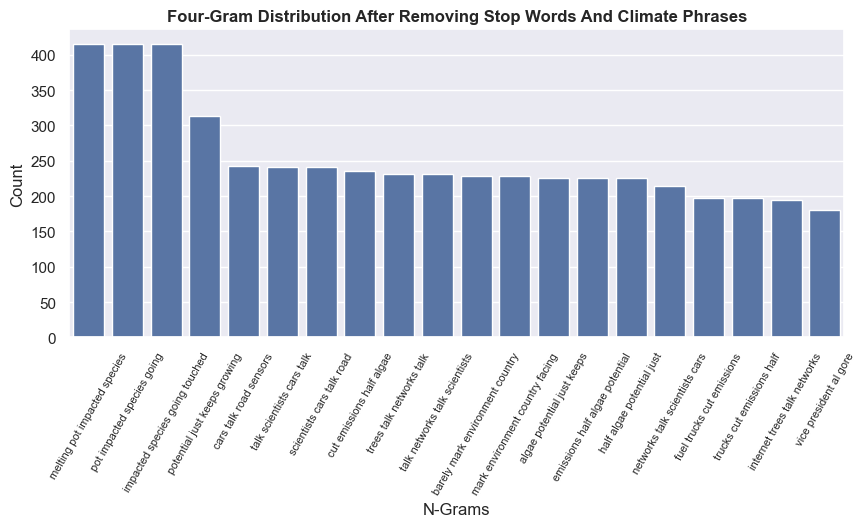

In [59]:
# Four-gram distribution After Removing CLimate Phrases (Stop Words Removed)
get_top_n_ngram(corpus=df['snippet_no_climate'], ngram_min=4, ngram_max=4)